# Descrição do projeto
Os clientes do Beta Bank estão saindo: pouco a pouco, escapulindo todo mês. Os banqueiros descobriram que é mais barato salvar os clientes existentes do que atrair novos.<br>
Precisamos prever se um cliente deixará o banco em breve. Você tem os dados sobre o comportamento passado dos clientes e rescisões de contratos com o banco.<br>
Construa um modelo com o valor máximo possível de F1. Para passar na revisão, você precisa de um valor F1 de pelo menos 0,59 para o conjunto de dados de teste.<br>
Além disso, meça a métrica AUC-ROC e compare-a com o valor F1.

## Baixando os dados

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import roc_curve

In [2]:
churn_clients = pd.read_csv('/datasets/Churn.csv')

In [3]:
churn_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn_clients.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Preparação dos dados

In [5]:
numeric = ['CreditScore', 'Age', 'Balance', 'Tenure', 'NumOfProducts', 'EstimatedSalary']
characteristcs = ['CreditScore', 'Age', 'Balance', 'Tenure', 'NumOfProducts', 'EstimatedSalary', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [6]:
#for i in range(0,len(numeric)):
#    churn_clients.boxplot(column=numeric[i])
#    plt.show()

In [7]:
churn_clients['Tenure'].fillna(churn_clients['Tenure'].median(), inplace=True)

In [8]:
churn_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## Examinando o equilíbrio das classes. 
Treine o modelo sem levar em conta o desequilíbrio. Descreva brevemente suas descobertas.

In [9]:
# Separando o conjunto em treino e validação

target = churn_clients['Exited']
features = churn_clients[characteristcs]
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

### Treinando Regressão Logística

In [10]:
logistic_regression_model = LogisticRegression(random_state=54321, solver='liblinear')
logistic_regression_model.fit(features_train[numeric], target_train)

LogisticRegression(random_state=54321, solver='liblinear')

### F1_Score classes desequilibradas

In [11]:
predicted_valid = logistic_regression_model.predict(features_valid[numeric])
f1_score(target_valid, predicted_valid)

0.10543657331136737

### AUC_ROC classes desequilibradas

In [12]:
probabilities_valid = logistic_regression_model.predict_proba(features_valid[numeric])
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.6710537204822715

## Melhorando a qualidade do modelo. 
Certifique-se de usar pelo menos duas abordagens para corrigir o desequilíbrio de classe. Use conjuntos de treinamento e validação para encontrar o melhor modelo e o melhor conjunto de parâmetros. Descreva brevemente suas descobertas.

### OHE 

In [13]:
categoric = ['Gender', 'Geography']
data_ohe = pd.get_dummies(churn_clients[categoric], drop_first=True)

data_ohe['RowNumber'] = data_ohe.index + 1
churn_clients = churn_clients.merge(data_ohe, on='RowNumber', how = 'left')
churn_clients.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


#### Ajustando as colunas que são caracteristicas

In [14]:
characteristcs.remove('Geography')
characteristcs.remove('Gender')
for i in range(len(data_ohe.columns) - 1):
    characteristcs.append(data_ohe.columns[i])
characteristcs

['CreditScore',
 'Age',
 'Balance',
 'Tenure',
 'NumOfProducts',
 'EstimatedSalary',
 'HasCrCard',
 'IsActiveMember',
 'Gender_Male',
 'Geography_Germany',
 'Geography_Spain']

#### Separando o conjunto de treino e de teste

In [15]:
features = churn_clients[characteristcs]
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

### Treinando Regressão Logística balanceada

In [16]:
balanced_logistic_regression_model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
balanced_logistic_regression_model.fit(features_train, target_train)
predicted_valid = balanced_logistic_regression_model.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.491250810110175

### Usando Scaler para padronizar a escala dos valores

In [17]:
pd.options.mode.chained_assignment = None
ordinals = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'Tenure', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[ordinals])
features_train[ordinals] = scaler.transform(features_train[ordinals])
features_valid[ordinals] = scaler.transform(features_valid[ordinals])

balanced_logistic_regression_model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
balanced_logistic_regression_model.fit(features_train, target_train)
predicted_valid = balanced_logistic_regression_model.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.5050234427327529

### Usando Modelo de Árvore de Decisão

In [18]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

# < escreva o código aqui >
print(f1_score(target_valid, predicted_valid))

0.48256880733944957


### Floresta aleatória

In [19]:
random_forest_best_score = 0
random_forest_best_est = 0
random_forest_best_model = None
for est in range(1, 21): # escolha o intervalo para o hiperparâmetro
    random_forest_model = RandomForestClassifier(random_state=54321, n_estimators=est)
    random_forest_model.fit(features_train, target_train)
    random_forest_score = random_forest_model.score(features_valid, target_valid) # cálculo da acurácia do conjunto de validação
    if random_forest_score > random_forest_best_score:
        random_forest_best_score = random_forest_score
        random_forest_best_est = est
        random_forest_best_model = random_forest_model
        
random_forest_predicted_valid = random_forest_model.predict(features_valid)
print(f1_score(target_valid, random_forest_predicted_valid))

0.5552941176470589


In [20]:
random_forest_best_score = 0
random_forest_best_est = 0
random_forest_best_model = None

for est in range(1, 50): # escolha o intervalo para o hiperparâmetro
    random_forest_model = RandomForestClassifier(random_state=54321, n_estimators=est,max_depth=100)
    random_forest_model.fit(features_train, target_train)
    random_forest_score = f1_score(target_valid,random_forest_model.predict(features_valid)) # cálculo da acurácia do conjunto de validação
    print(est)
    print(random_forest_score)
    if random_forest_score > random_forest_best_score:
        random_forest_best_score = random_forest_score
        random_forest_best_est = est
        random_forest_best_model = random_forest_model
        
random_forest_predicted_valid = random_forest_model.predict(features_valid)
print(f1_score(target_valid, random_forest_predicted_valid))

1
0.4633204633204633
2
0.38031914893617025
3
0.5175718849840255
4
0.48470012239902077
5
0.5444566410537871
6
0.5175332527206772
7
0.5534729878721059
8
0.5251798561151079
9
0.5621500559910414
10
0.5454545454545454
11
0.5601799775028122
12
0.5514792899408284
13
0.5707762557077625
14
0.5510688836104513
15
0.5664739884393064
16
0.5536992840095466
17
0.568445475638051
18
0.5562130177514794
19
0.5717566016073479
20
0.5552941176470589
21
0.570446735395189
22
0.5627198124267292
23
0.5720823798627003
24
0.56
25
0.5671296296296295
26
0.5660377358490566
27
0.57439446366782
28
0.5697538100820634
29
0.5839080459770114
30
0.5741176470588235
31
0.5912240184757506
32
0.5784543325526933
33
0.5983889528193326
34
0.5857642940490081
35
0.5914844649021864
36
0.5892018779342723
37
0.5954022988505747
38
0.5871345029239766
39
0.5893271461716937
40
0.5828437132784958
41
0.5880980163360561
42
0.5861664712778428
43
0.5876887340301974
44
0.5774647887323944
45
0.5823665893271462
46
0.5721040189125296
47
0.58700696

Usando método anterior e modificando poucos hiperparametros

In [21]:
random_forest_best_score = 0
random_forest_best_est = 0
random_forest_best_depth = 0
random_forest_best_model = None

for depth in range(100, 300, 100):
    for est in range(1, 50): # escolha o intervalo para o hiperparâmetro
        random_forest_model = RandomForestClassifier(random_state=54321, n_estimators=est,max_depth=depth, max_features='log2')
        random_forest_model.fit(features_train, target_train)
        random_forest_score = f1_score(target_valid,random_forest_model.predict(features_valid)) # cálculo da acurácia do conjunto de validação
    #print(est)
    #print(random_forest_score)
        if (random_forest_score > random_forest_best_score):
            random_forest_best_score = random_forest_score
            random_forest_best_est = est
            random_forest_best_depth = depth
            random_forest_best_model = random_forest_model
        
random_forest_predicted_valid = random_forest_best_model.predict(features_valid)
print(random_forest_best_est)
print(random_forest_best_depth)
print(f1_score(target_valid, random_forest_predicted_valid))

33
100
0.5983889528193326


#### Floresta aleatória usando GridSearchCV para tuning

In [22]:
# Hiperparametros para testar

# max_features: The number of features to consider when looking for the best split
max_features = ['sqrt', 'log2']
# n_estimators: The number of trees in the forest.
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 50)]
# max_depth: The maximum depth of the tree
max_depth = [100, 200, 300]

In [23]:
# Criar o grid de hiper parâmetros

param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth
             }
print(param_grid)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'max_features': ['sqrt', 'log2'], 'max_depth': [100, 200, 300]}


In [24]:
# Modelo de Árvore Aleatória

rf_model = RandomForestClassifier(random_state=54321)

In [25]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1, scoring='f1_micro')

In [26]:
rf_grid.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=54321),
             n_jobs=-1,
             param_grid={'max_depth': [100, 200, 300],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='f1_micro')

In [27]:
rf_grid.best_params_

{'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 31}

#### Floresta aleatória usando RandomizedSearchCV para tuning

In [28]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, cv=10, verbose=0, n_jobs=-1, scoring='f1_micro')

In [29]:
rf_random.fit(features_train, target_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=54321),
                   n_jobs=-1,
                   param_distributions={'max_depth': [100, 200, 300],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='f1_micro')

In [30]:
rf_random.best_params_

{'n_estimators': 33, 'max_features': 'log2', 'max_depth': 300}

#### Comparando os dois métodos

In [31]:
rf_grid_predicted_valid = rf_grid.predict(features_valid)
print('O F1 Score para o GridSearchCV é: ', f1_score(target_valid, rf_grid_predicted_valid))
print('-------------------------------')
rf_random_predicted_valid = rf_random.predict(features_valid)
print('O F1 Score para o RandomizedSearchCV é: ',f1_score(target_valid, rf_random_predicted_valid))

O F1 Score para o GridSearchCV é:  0.5912240184757506
-------------------------------
O F1 Score para o RandomizedSearchCV é:  0.5983889528193326


## Teste Final

### Valor AUC_ROC para o modelo encontrado pelo GridSearchCV

In [32]:
rf_grid_probabilities_valid = rf_grid.predict_proba(features_valid[characteristcs])
rf_grid_probabilities_one_valid = rf_grid_probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, rf_grid_probabilities_one_valid)
auc_roc

0.842579249007158

### Gráfico AUC_ROC para o modelo encontrado pelo GridSearchCV

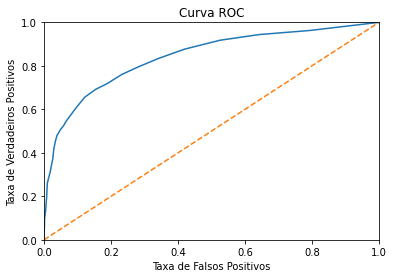

In [33]:
fpr, tpr, thresholds = roc_curve(target_valid, rf_grid_probabilities_one_valid) # < escreva o código aqui >

plt.figure()

# < construir o gráfico >
plt.plot(fpr, tpr)
# Curva ROC para modelo aleatório (parece uma linha reta)
plt.plot([0, 1], [0, 1], linestyle='--')

# < use as funções plt.xlim() e plt.ylim() para
#   defina o limite para os eixos de 0 a 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# < use as funções plt.xlabel() e plt.ylabel() para
#   nomear os eixos "Taxa de positivos falsos e "Taxa de positivos verdadeiros" >
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')

# < adicione o cabeçalho "curva ROC" com a função plt.title() >
plt.title('Curva ROC')
plt.show()

### Comparação F1_score e ROC

Com F1_score 0,59 e AUC_ROC 0,84 o modelo parece estar distinguindo bem verdadeiros positivos e falsos positivos, porém ainda tem um espaço para otimização de precisão e sensibilidade, pode estar obtendo uma quantidade razoável de falsos negativos.